# Ask Phase
**Stake Holders**
* Director of marketing
* Cyclistic executive team

#  Cyclistic Bike-Share Case Study
> **Introduction**
This case study of bike sahre data from the 'Cyclistic' compny is for the capstone project of Data Analytics Professional certificate. This bike sharing has over 5,800 bikes and 600 dock stations operates around Chicago. The company’s marketing director is planning to maximize the number of memberships by creating marketing strategies to convert casual riders. Casual riders are customers that purchase single-ride or full-day passes. Cyclistic members are customers that purchase annual memberships. As a junior data analyst for Cyclistic, my task is to make data-driven recommendations for the marketing team to act on. This analysis will complete by using the six phases of the data analysis process: Ask, Prepare, Process, Analyze, and Act (APPAA).

**Business Task**
> How do annual members and casual riders use Cyclistic bikes differently?

**Deliverables**
* Insights on how annual members and casual riders use Cyclistic bikes differently
* Provide effective visuals and relevant data to support insights
* Use insights to give three recommendations to convert casual riders to member riders

# Prepair Phase
**About the data for this analysis:**

Since Cyclistic is a fictional company, I will use Divvy’s, a bike-share program based in Chicago, data from April 2020 – March 2021 to complete this case study. To download the data, please use this link. This data was made public by Motivate International Inc, under this license. Due to data privacy issues, personal information has been removed or encrypted.

In [2]:
#Load the tidyverse, lubridate, ggplot2, sqldf and psych libraries
library(tidyverse)
library(lubridate)
library(ggplot2)
library(plotrix)
library(repr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [3]:
#Load data
df_202107<-read_csv("../input/cyclistic-bike-share/202107-divvy-tripdata.csv")
df_202108<-read_csv("../input/cyclistic-bike-share/202108-divvy-tripdata.csv")
df_202109<-read_csv("../input/cyclistic-bike-share/202109-divvy-tripdata.csv")
df_202110<-read_csv("../input/cyclistic-bike-share/202110-divvy-tripdata.csv")
df_202111<-read_csv("../input/cyclistic-bike-share/202111-divvy-tripdata.csv")
df_202112<-read_csv("../input/cyclistic-bike-share/202112-divvy-tripdata.csv")
df_202201<-read_csv("../input/cyclistic-bike-share/202201-divvy-tripdata.csv")
df_202202<-read_csv("../input/cyclistic-bike-share/202202-divvy-tripdata.csv")
df_202203<-read_csv("../input/cyclistic-bike-share/202203-divvy-tripdata.csv")
df_202204<-read_csv("../input/cyclistic-bike-share/202204-divvy-tripdata.csv")
df_202205<-read_csv("../input/cyclistic-bike-share/202205-divvy-tripdata.csv")
df_202206<-read_csv("../input/cyclistic-bike-share/202206-divvy-tripdata.csv")


Rows: 822410 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 804352 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 756147 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7

**Verify data's integrity:**
Checking all data frames to make sure they all have the same column numbers, column names, and same data types.

In [4]:
#checking the struchture of the data sets
str(df_202107)
str(df_202108)
str(df_202109)
str(df_202110)
str(df_202111)
str(df_202112)
str(df_202201)
str(df_202202)
str(df_202203)
str(df_202204)
str(df_202205)
str(df_202206)


spec_tbl_df [822,410 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:822410] "0A1B623926EF4E16" "B2D5583A5A5E76EE" "6F264597DDBF427A" "379B58EAB20E8AA5" ...
 $ rideable_type     : chr [1:822410] "docked_bike" "classic_bike" "classic_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:822410], format: "2021-07-02 14:44:36" "2021-07-07 16:57:42" ...
 $ ended_at          : POSIXct[1:822410], format: "2021-07-02 15:19:58" "2021-07-07 17:16:09" ...
 $ start_station_name: chr [1:822410] "Michigan Ave & Washington St" "California Ave & Cortez St" "Wabash Ave & 16th St" "California Ave & Cortez St" ...
 $ start_station_id  : chr [1:822410] "13001" "17660" "SL-012" "17660" ...
 $ end_station_name  : chr [1:822410] "Halsted St & North Branch St" "Wood St & Hubbard St" "Rush St & Hubbard St" "Carpenter St & Huron St" ...
 $ end_station_id    : chr [1:822410] "KA1504000117" "13432" "KA1503000044" "13196" ...
 $ start_lat         : num [1:822410] 41.9 41.9 41.9 41.

In [5]:
# Verify column names for all data frames
colnames(df_202107)
colnames(df_202108)
colnames(df_202109)
colnames(df_202110)
colnames(df_202111)
colnames(df_202112)
colnames(df_202201)
colnames(df_202202)
colnames(df_202203)
colnames(df_202204)
colnames(df_202205)
colnames(df_202206)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

**Combine all 12 data frames**

As all the column names and data types maches accross all 12 data frames,will combine them to form one large data frame in order to make the analyzing easy.


In [6]:
# merge individual data frames together
all_tripdata <- rbind(df_202107,df_202108,df_202109,df_202110, df_202111,df_202112,df_202201,df_202202, 
df_202203, df_202204, df_202205,df_202206)

# Process Phase
**Inspect the 'all_tripdata'**

In [7]:
str(all_tripdata)

glimpse(all_tripdata)

nrow(all_tripdata)

spec_tbl_df [5,900,385 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:5900385] "0A1B623926EF4E16" "B2D5583A5A5E76EE" "6F264597DDBF427A" "379B58EAB20E8AA5" ...
 $ rideable_type     : chr [1:5900385] "docked_bike" "classic_bike" "classic_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:5900385], format: "2021-07-02 14:44:36" "2021-07-07 16:57:42" ...
 $ ended_at          : POSIXct[1:5900385], format: "2021-07-02 15:19:58" "2021-07-07 17:16:09" ...
 $ start_station_name: chr [1:5900385] "Michigan Ave & Washington St" "California Ave & Cortez St" "Wabash Ave & 16th St" "California Ave & Cortez St" ...
 $ start_station_id  : chr [1:5900385] "13001" "17660" "SL-012" "17660" ...
 $ end_station_name  : chr [1:5900385] "Halsted St & North Branch St" "Wood St & Hubbard St" "Rush St & Hubbard St" "Carpenter St & Huron St" ...
 $ end_station_id    : chr [1:5900385] "KA1504000117" "13432" "KA1503000044" "13196" ...
 $ start_lat         : num [1:5900385] 41.9 41

[1] 5900385

**Adding new columns with calculations**

In [8]:
# ride_length column in minutes
all_tripdata$ride_length <- difftime(all_tripdata$ended_at, all_tripdata$started_at, units = "mins")
all_tripdata$ride_length <- round(all_tripdata$ride_length,2)

# day_of_week column
all_tripdata <- all_tripdata %>% mutate(day_of_week = weekdays(started_at))

# month column
all_tripdata <- all_tripdata %>%
    mutate(all_tripdata, date = as.Date(all_tripdata$started_at)) %>%
    mutate(month = format(as.Date(date), "%B"))

In [9]:
#take a look at the newly created columns
head(all_tripdata)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,date,month
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<drtn>,<chr>,<date>,<chr>
0A1B623926EF4E16,docked_bike,2021-07-02 14:44:36,2021-07-02 15:19:58,Michigan Ave & Washington St,13001,Halsted St & North Branch St,KA1504000117,41.88398,-87.62468,41.89937,-87.64848,casual,35.37 mins,Friday,2021-07-02,July
B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.90036,-87.69670,41.88990,-87.67147,casual,18.45 mins,Wednesday,2021-07-07,July
6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,Wabash Ave & 16th St,SL-012,Rush St & Hubbard St,KA1503000044,41.86038,-87.62581,41.89017,-87.62619,member,17.83 mins,Sunday,2021-07-25,July
379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.90036,-87.69670,41.89456,-87.65345,member,15.03 mins,Thursday,2021-07-08,July
6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.90035,-87.69668,41.88659,-87.65839,casual,19.05 mins,Wednesday,2021-07-28,July
62DC2B32872F9BA8,electric_bike,2021-07-29 17:09:08,2021-07-29 17:15:00,California Ave & Cortez St,17660,Albany Ave & Bloomingdale Ave,15655,41.90033,-87.69674,41.91389,-87.70513,casual,5.87 mins,Thursday,2021-07-29,July


In [10]:
#removing rows that have ride_length less than 0 ans over 24hrs
all_tripdata_v1 <- all_tripdata[!(all_tripdata$ride_length <= 0 | all_tripdata$ride_length > 1440),]

**Looking for any inconsistancies in the data** 

In [11]:
#searching for duplicates in ride_id
length(unique(all_tripdata_v1$ride_id)) == nrow(all_tripdata_v1)

[1] TRUE

In [12]:
all_tripdata_v2 <- all_tripdata_v1[rowSums(is.na(all_tripdata_v1)) == 0,]


In [13]:
#all_tripdata_v2$time <- format(all_tripdata_v2$started_at, format = "%H:%M")
#all_tripdata_v2$time <- as.POSIXct(all_tripdata_v2$time, format = "%H:%M")

In [14]:
all_tripdata_v2 <- all_tripdata_v2 %>%
    mutate(start_hour = strftime(all_tripdata_v2$started_at, "%H"))
unique(all_tripdata_v2$start_hour)

[1] "14" "16" "11" "22" "17" "12" "18" "21" "20" "15" "07" "19" "09" "10" "13"
[16] "05" "01" "08" "23" "04" "00" "02" "06" "03"

In [15]:
head(all_tripdata_v2)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,date,month,start_hour
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<drtn>,<chr>,<date>,<chr>,<chr>
0A1B623926EF4E16,docked_bike,2021-07-02 14:44:36,2021-07-02 15:19:58,Michigan Ave & Washington St,13001,Halsted St & North Branch St,KA1504000117,41.88398,-87.62468,41.89937,-87.64848,casual,35.37 mins,Friday,2021-07-02,July,14
B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.90036,-87.69670,41.88990,-87.67147,casual,18.45 mins,Wednesday,2021-07-07,July,16
6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,Wabash Ave & 16th St,SL-012,Rush St & Hubbard St,KA1503000044,41.86038,-87.62581,41.89017,-87.62619,member,17.83 mins,Sunday,2021-07-25,July,11
379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.90036,-87.69670,41.89456,-87.65345,member,15.03 mins,Thursday,2021-07-08,July,22
6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.90035,-87.69668,41.88659,-87.65839,casual,19.05 mins,Wednesday,2021-07-28,July,16
62DC2B32872F9BA8,electric_bike,2021-07-29 17:09:08,2021-07-29 17:15:00,California Ave & Cortez St,17660,Albany Ave & Bloomingdale Ave,15655,41.90033,-87.69674,41.91389,-87.70513,casual,5.87 mins,Thursday,2021-07-29,July,17


# Analyze Phase


In [16]:
#Min, Max, Median, Mean values for ride length
all_tripdata_v2 %>%
    summarise(min_ride_length = min(ride_length), max_ride_length = max(ride_length), 
              median_ride_length = median(ride_length), mean_ride_length = mean(ride_length))

min_ride_length,max_ride_length,median_ride_length,mean_ride_length
<drtn>,<drtn>,<drtn>,<drtn>
0.02 mins,1439.37 mins,11.42 mins,18.40786 mins


In [17]:
#Average ride length between casual and member riders
aggregate(ride_length ~ member_casual, data=all_tripdata_v2,mean)

member_casual,ride_length
<chr>,<drtn>
casual,26.10918 mins
member,12.62422 mins


**Analyze how members and casual riders use bike share over a week**

In [18]:
# make the order of the day_of_week column
all_tripdata_v2$day_of_week <- ordered(all_tripdata_v2$day_of_week, levels=c("Monday","Tuesday","Wednesday", "Thursday", 
                                                                                           "Friday", "Saturday", "Sunday"))

In [19]:
all_tripdata_v2 %>%
    group_by(day_of_week, member_casual) %>%
    summarise(number_of_rides = n(), avg_ridelength = mean(ride_length))

`summarise()` has grouped output by 'day_of_week'. You can override using the
`.groups` argument.


day_of_week,member_casual,number_of_rides,avg_ridelength
<ord>,<chr>,<int>,<drtn>
Monday,casual,235717,26.99351 mins
Monday,member,377030,12.24778 mins
Tuesday,casual,209832,23.15515 mins
Tuesday,member,418327,11.77122 mins
Wednesday,casual,216074,22.48050 mins
Wednesday,member,416858,11.92455 mins
Thursday,casual,248318,23.06010 mins
Thursday,member,420866,12.07483 mins
Friday,casual,280582,24.39237 mins


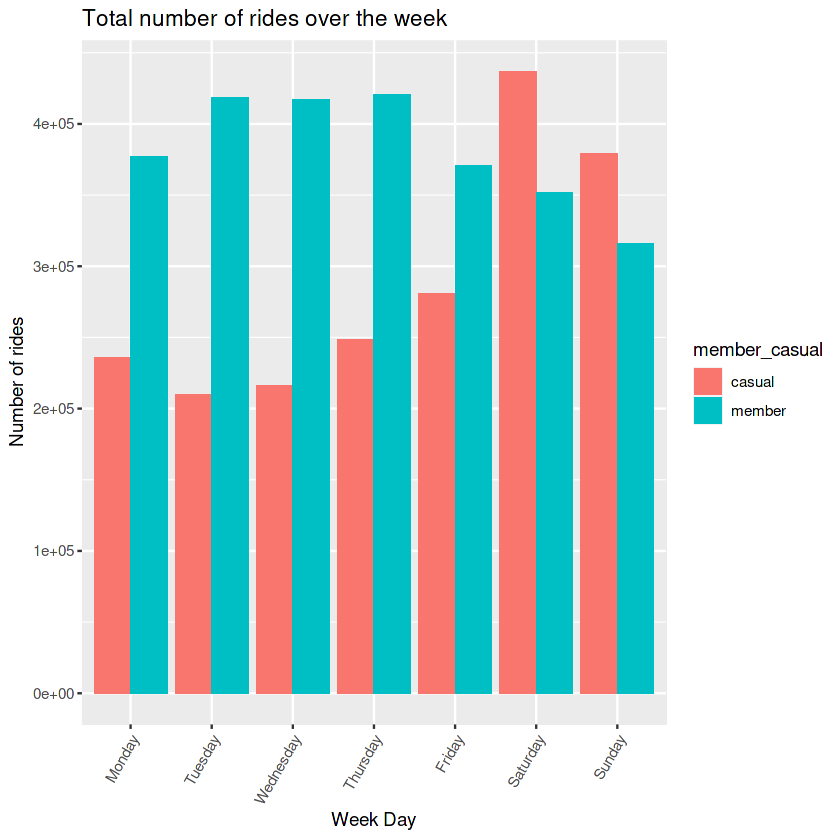

In [20]:
all_tripdata_v2 %>%
    group_by(member_casual, day_of_week) %>%
    summarise(number_of_rides = n(), .groups = 'drop') %>%
    ggplot(aes(x = day_of_week, y = number_of_rides, fill = member_casual)) + 
    geom_bar(position = "dodge", stat = "identity")+ labs (title = "Total number of rides over the week", x= "Week Day", y ="Number of rides") +
    theme(axis.text.x  = element_text(angle = 60, hjust = 1) )

In [21]:
#Find the total casual rides on Saturday, Sunday compared to Monday through Friday

total_rides_casual_sat_sun <- NROW(filter(all_tripdata_v2, member_casual == "casual" & (day_of_week == "Saturday" | day_of_week == "Sunday")))
total_rides_casual_sat_sun

total_rides_casual_mon_fri <- NROW(filter(all_tripdata_v2, member_casual == "casual" & !(day_of_week == "Saturday" | day_of_week == "Sunday")))
total_rides_casual_mon_fri

[1] 815831

[1] 1190523

In [22]:
#Percentage of casual riders on Saturday, Sunday compared to Monday through Friday

pie_slices_casual <- c(total_rides_casual_mon_fri, total_rides_casual_sat_sun)
pie_percent <- round(100 * pie_slices_casual / sum(pie_slices_casual), 1)

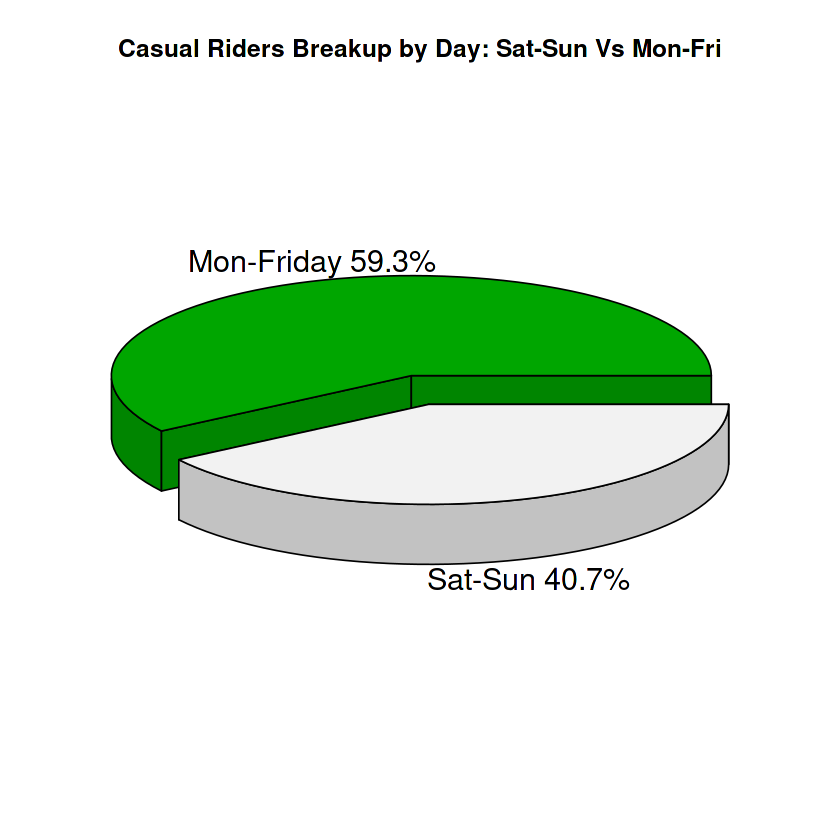

In [23]:
labels <- c("Mon-Friday", "Sat-Sun")
lbs <- paste(labels,pie_percent)
lbs_percent <- paste(lbs,'%', sep = "")

pie3D(pie_slices_casual, labels = lbs_percent, explode = 0.1, col= terrain.colors(2), main = "Casual Riders Breakup by Day: Sat-Sun Vs Mon-Fri")

***Casual Riders prefer to ride more on weekends (Satuarday & Sunday)***

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



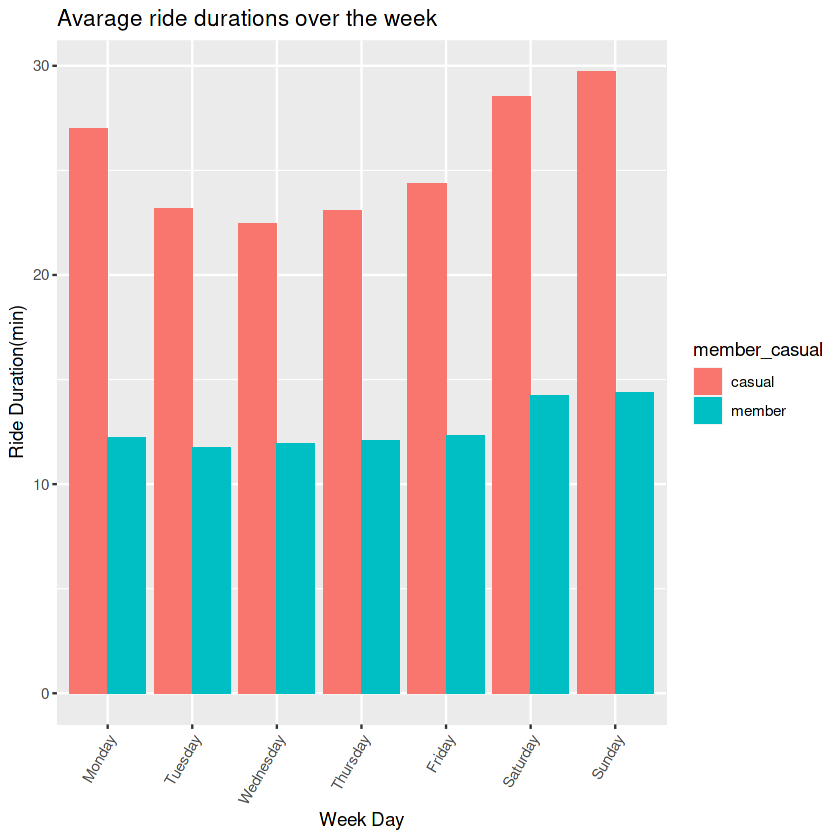

In [24]:
all_tripdata_v2 %>%
    group_by(member_casual, day_of_week) %>%
    summarise(avg_ridelength = mean(ride_length), .groups = 'drop') %>%
    ggplot(aes(x = day_of_week, y = avg_ridelength, fill = member_casual)) + 
    geom_bar(position = "dodge", stat = "identity")+ labs (title = "Avarage ride durations over the week", x= "Week Day", y ="Ride Duration(min)") +
    theme(axis.text.x  = element_text(angle = 60, hjust = 1) )

***On average, casual riders have longer ride length than member riders.***

**Analyze data by Month**

In [25]:
#Assign the order to each month of the year
all_tripdata_v2$month <-
    ordered(all_tripdata_v2$month, levels = c('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'))

In [26]:
#Avarage ride length of members & casual riders over the year
all_tripdata_v2 %>%
    group_by(month,member_casual)%>%
    summarise(number_of_riders = n(), avg_ridetime = mean(ride_length)) %>%
    arrange(month)

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


month,member_casual,number_of_riders,avg_ridetime
<ord>,<chr>,<int>,<drtn>
January,casual,12588,18.07631 mins
January,member,67523,10.26994 mins
February,casual,15130,21.34275 mins
February,member,74030,10.62541 mins
March,casual,67119,26.39645 mins
March,member,148818,11.76777 mins
April,casual,91879,25.69172 mins
April,member,180653,11.57762 mins
May,casual,220218,27.57258 mins


Warning message:
“Ignoring unknown parameters: stat”


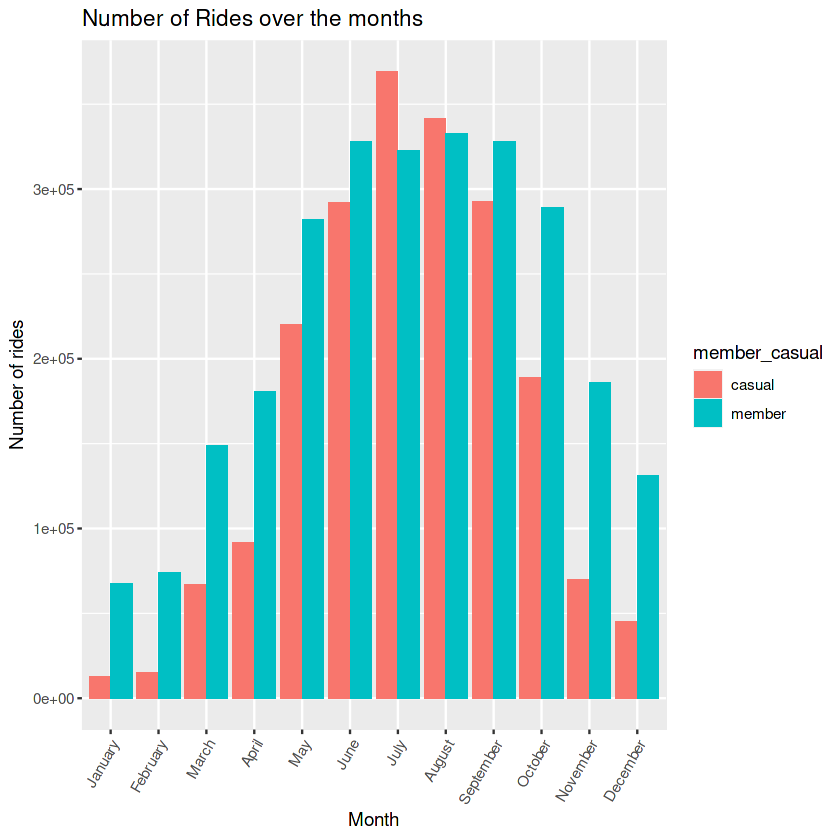

In [27]:
all_tripdata_v2 %>%
    group_by(month,member_casual)%>%
    summarise(number_of_riders = n(), .groups = 'drop') %>%
    ggplot(aes(x = month, y = number_of_riders, fill = member_casual)) + 
    geom_col(position = "dodge", stat = "identity")+ labs (title = "Number of Rides over the months", x= "Month", y ="Number of rides") +
    theme(axis.text.x  = element_text(angle = 60, hjust = 1) )

In [28]:
#analyzing total casual rides by month: Jun-Sep & Oct-May
total_casual_rides_R1 <- NROW(filter(all_tripdata_v2, member_casual == 'casual'& (month =='June'| month == 'July'| month== 'August' | month =='September')))
total_casual_rides_R1

total_casual_rides_R2 <- NROW(filter(all_tripdata_v2, member_casual == 'casual'& !(month =='June'| month == 'July'| month== 'August' | month =='September')))
total_casual_rides_R2

[1] 1295427

[1] 710927

In [29]:
#Percentage of casual riders on Jun-Sep compared to rest of the months

pie_slices_casual_m <- c(total_casual_rides_R1, total_casual_rides_R2)
pie_percent_m <- round(100 * pie_slices_casual_m / sum(pie_slices_casual_m), 1)

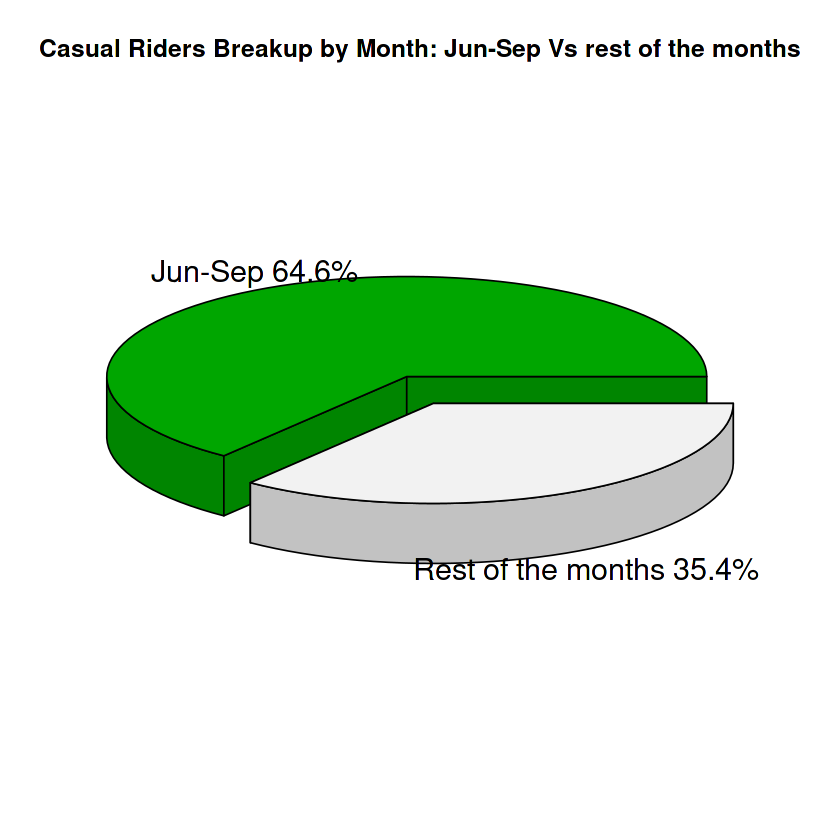

In [30]:
labels_m <- c("Jun-Sep", "Rest of the months")
lbs_m <- paste(labels_m,pie_percent_m)
lbs_percent_m <- paste(lbs_m,'%', sep = "")

pie3D(pie_slices_casual_m, labels = lbs_percent_m, explode = 0.1, col= terrain.colors(2), main = "Casual Riders Breakup by Month: Jun-Sep Vs rest of the months")

Warning message:
“Ignoring unknown parameters: stat”
Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



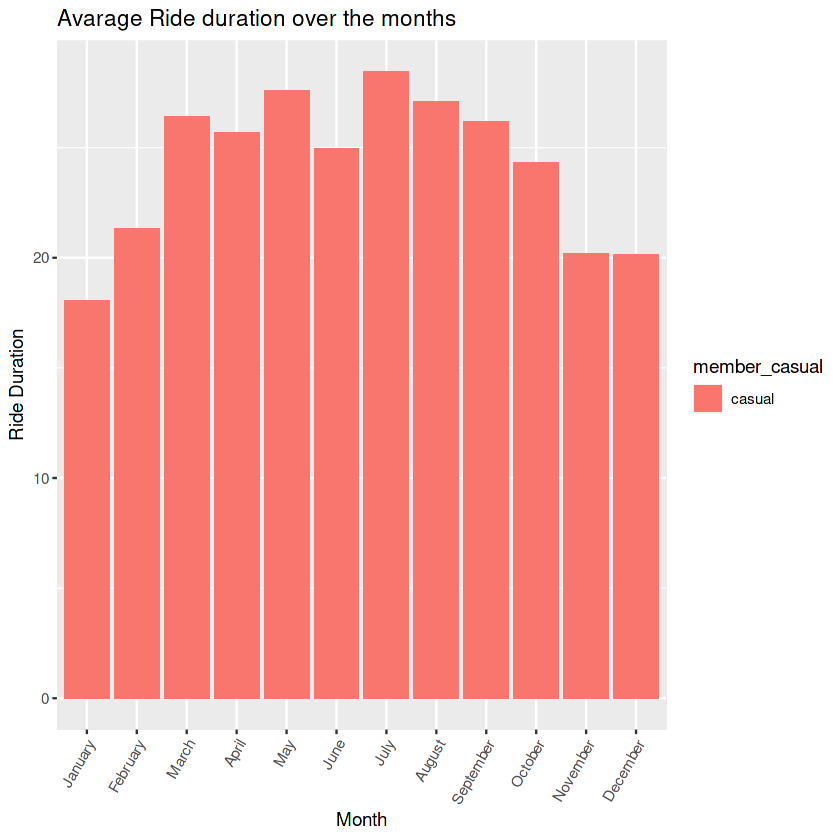

In [31]:
#Avarage ride length of members & casual riders over the year
all_tripdata_v2 %>%
    group_by(month,member_casual)%>%
    summarise(avg_ridetime = mean(ride_length), .groups='drop') %>%
filter(member_casual == 'casual')%>%
    ggplot(aes(x = month, y = avg_ridetime, fill = member_casual)) + 
    geom_col(position = "dodge", stat = "identity")+ labs (title = "Avarage Ride duration over the months", x= "Month", y ="Ride Duration") +
    theme(axis.text.x  = element_text(angle = 60, hjust = 1) )

In [32]:
#Analyze the rides by bike type
all_tripdata_v2 %>%
    group_by(rideable_type, member_casual) %>%
    summarise(number_of_ride = n(), .groups = 'drop')

rideable_type,member_casual,number_of_ride
<chr>,<chr>,<int>
classic_bike,casual,1213648
classic_bike,member,1968003
docked_bike,casual,251439
electric_bike,casual,541267
electric_bike,member,703596


Warning message:
“Ignoring unknown parameters: stat”


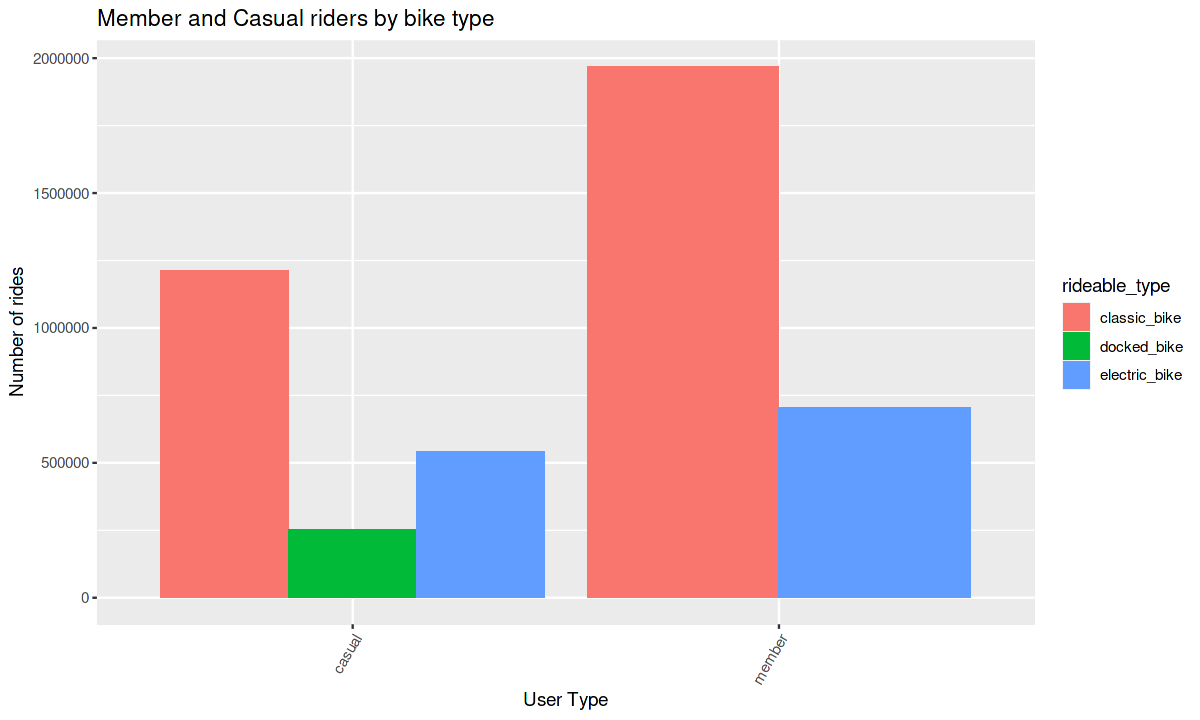

In [38]:
#Analyze the rides by bike type
all_tripdata_v2 %>%
    group_by(rideable_type, member_casual) %>%
    summarise(number_of_ride = n(), .groups = 'drop') %>%
    ggplot(aes(x=member_casual, y = number_of_ride,fill = rideable_type))+
    geom_col(position = 'dodge', stat = 'identity')+
    labs(title = "Member and Casual riders by bike type", x= "User Type", y ="Number of rides") +
    theme(axis.text.x  = element_text(angle = 60, hjust = 1) )

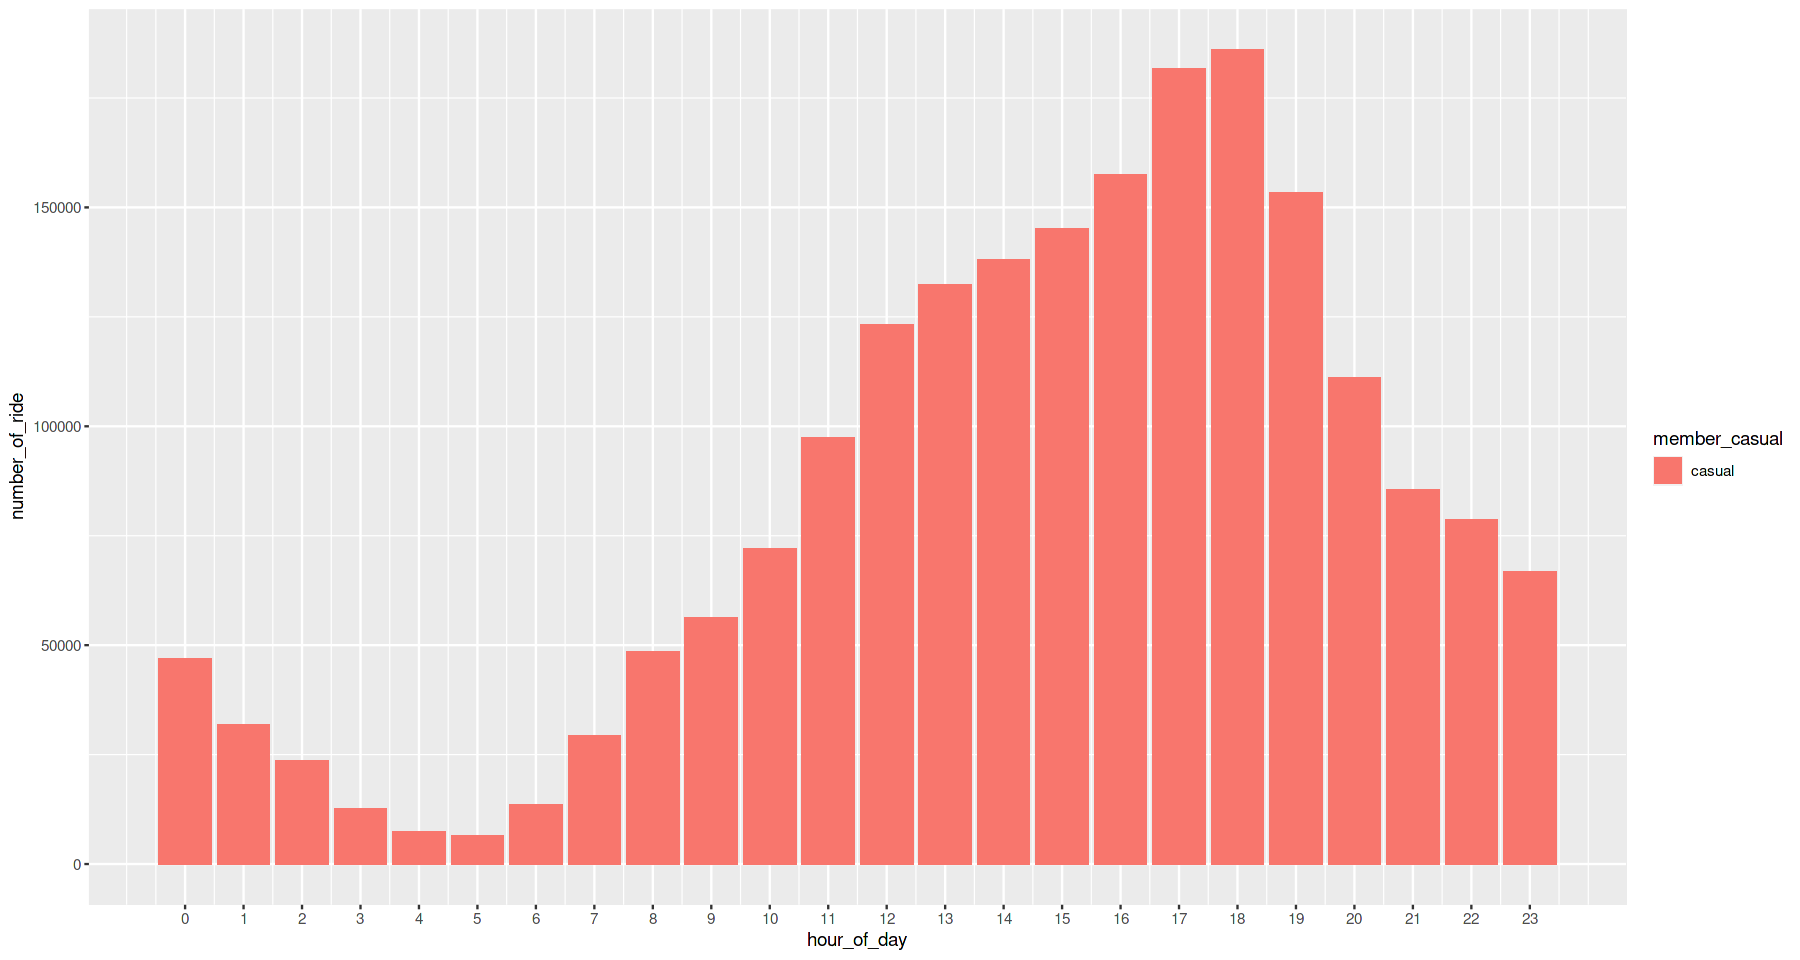

In [34]:
options(repr.plot.width = 15,repr.plot.height = 8)
#Visualize casual rider's number of ride for each hour of the day 
all_tripdata_v2 %>%
    mutate(hour_of_day = hour(round_date(started_at, unit ="hour"))) %>%
    filter(member_casual == 'casual') %>%
    group_by(hour_of_day, member_casual) %>%
    summarise(number_of_ride = n(), .groups = 'drop') %>%
    ggplot(aes(x = hour_of_day, y = number_of_ride, fill = member_casual)) +
    geom_bar(position = 'dodge', stat = 'identity') +
    scale_x_continuous(breaks=c(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23))

**As per the graph we can see there is a high demand for the service between 4-7pm**

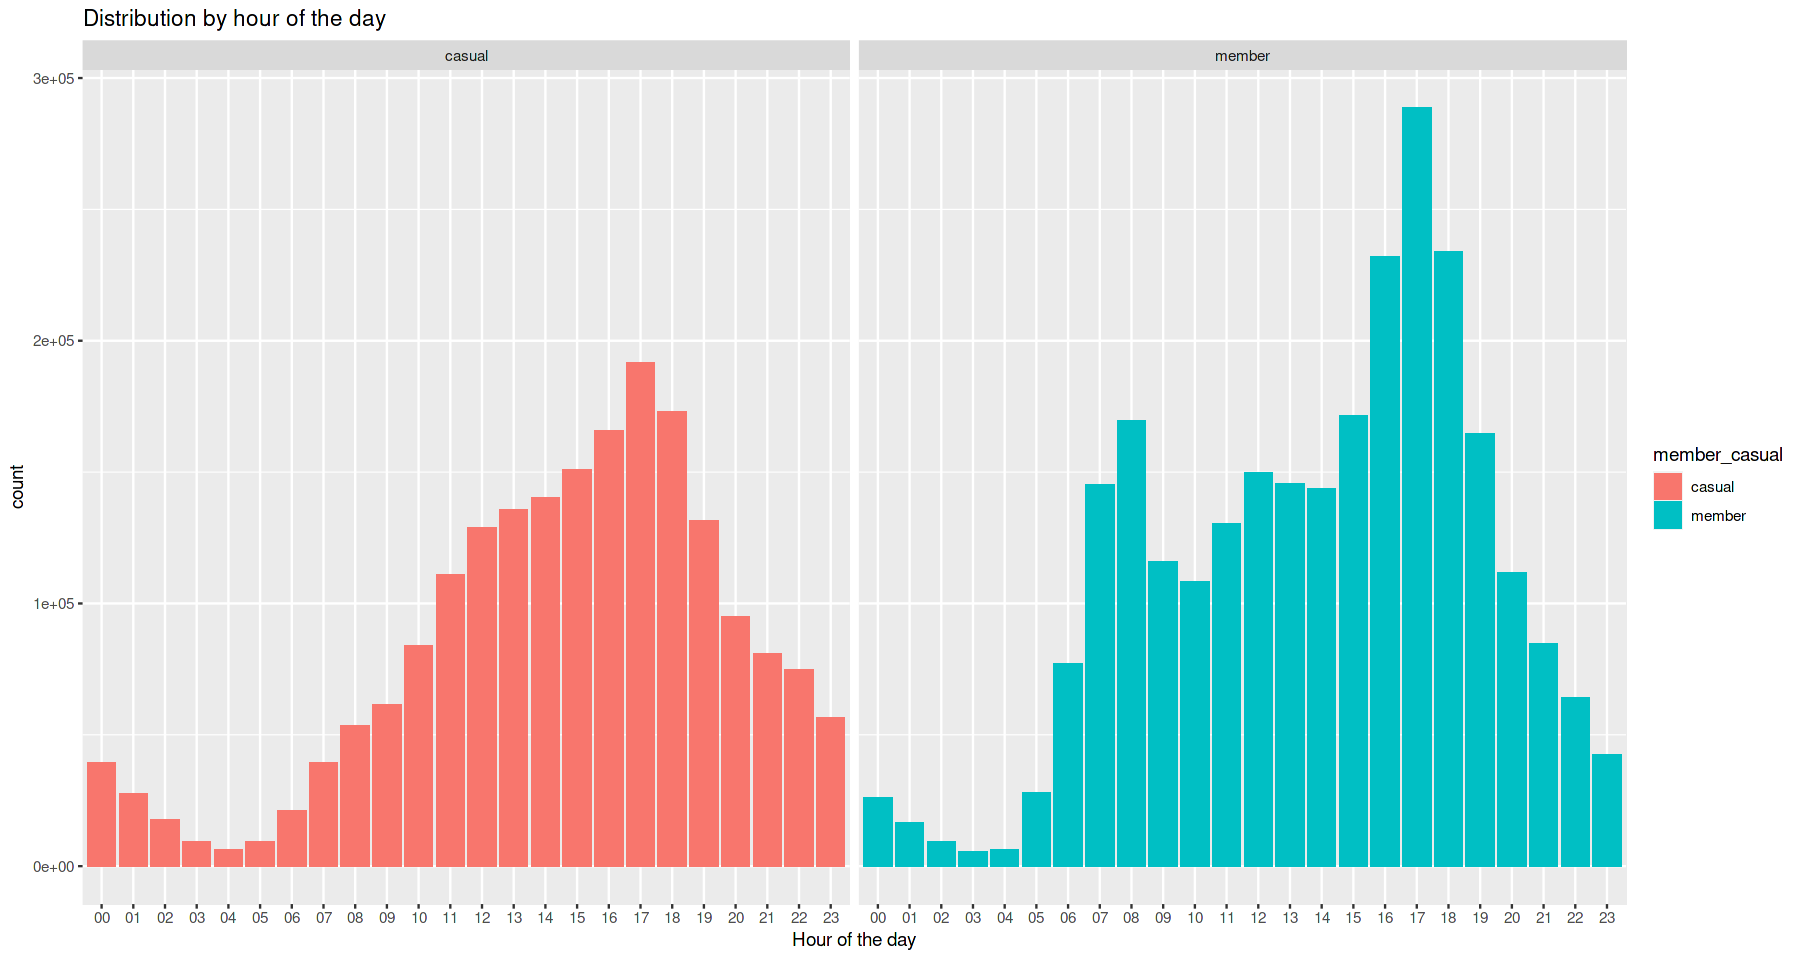

In [35]:
# Analysis by the hour of the day
# For further analysing we can consider how two user types utilize the bike share around the clock in a day
options(repr.plot.width = 15,repr.plot.height = 8)
all_tripdata_v2 %>%
    ggplot(aes(start_hour, fill = member_casual)) +
    labs(x="Hour of the day", title="Distribution by hour of the day") +
    geom_bar()+
     facet_wrap(~ member_casual)
options(repr.plot.width = 6,repr.plot.height = 6)

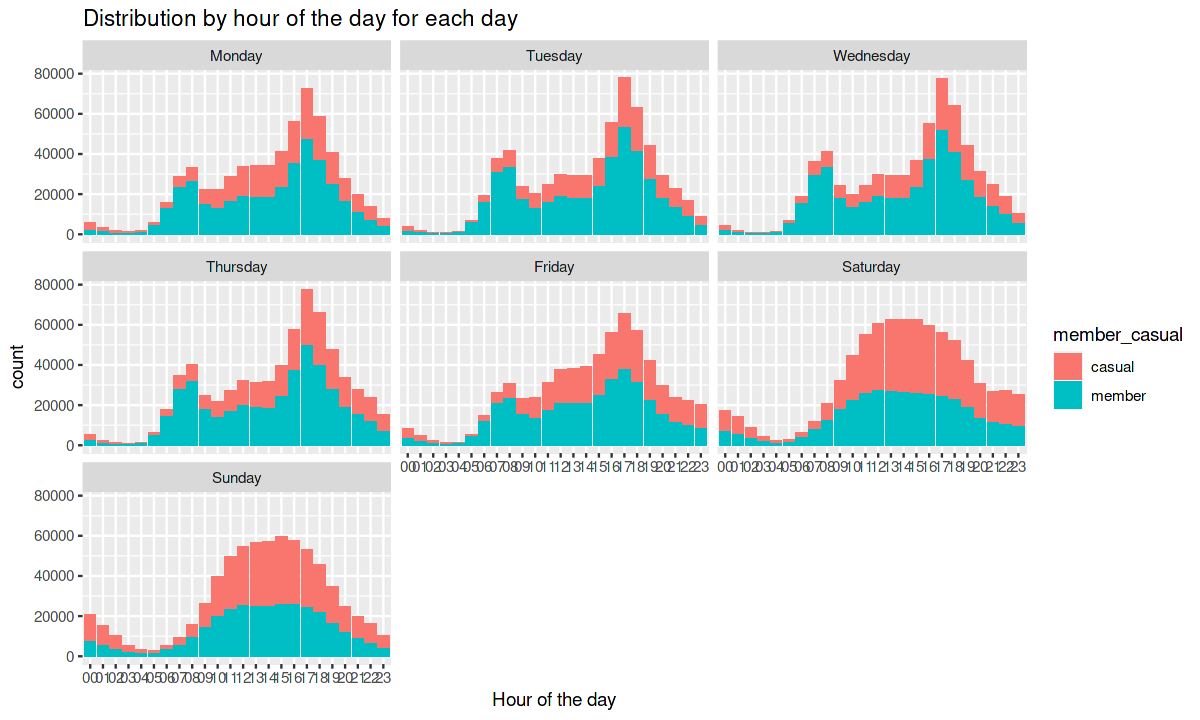

In [36]:
options(repr.plot.width = 10,repr.plot.height = 6)
all_tripdata_v2 %>%
    ggplot(aes(start_hour, fill=member_casual)) +
    geom_bar() +
    labs(x="Hour of the day", title="Distribution by hour of the day for each day") +
    facet_wrap(~day_of_week)

**By examine above two plots we can see..**
* On weekdays there are two peaks around 6-7am and 5-6pm
* On weekends graph is smooth cure for both the user types
* On weekend more flow in between 11am to 6pm.

**Start Station Analysis**

In [37]:
#Most popular start stations for casual riders
all_tripdata_v2 %>%
    group_by(start_station_name,member_casual) %>%
    summarise(number_of_riders = n(), .groups = 'drop') %>%
    filter(start_station_name != "", member_casual != 'member') %>%
    arrange(-number_of_riders)%>%
    head(n = 10)
    

start_station_name,member_casual,number_of_riders
<chr>,<chr>,<int>
Streeter Dr & Grand Ave,casual,63202
Millennium Park,casual,29313
DuSable Lake Shore Dr & Monroe St,casual,28154
Michigan Ave & Oak St,casual,27545
DuSable Lake Shore Dr & North Blvd,casual,23327
Shedd Aquarium,casual,21701
Theater on the Lake,casual,19940
Wells St & Concord Ln,casual,18456
Clark St & Lincoln Ave,casual,15454


**Conclusion.**

With the analyzing I've done so far withthe Cyclistic data I can conclude following differences in usage of Cyclistic bike share service by casual riders and members --

* Casual riders prefer classic bikes and e-bikes while members' do the same.

* Casual riders took more rides on weekends and members took on weekdays. But, the number of rides taken by casuals riders any day of the week is almost double of teh members.

* In Morning time there are more number of members than casual riders. this is propably due to memebrs tend to use it for commute to work.

* Average ride length of casual riders was almost double of members.

* Most of the rides has taken in the month of June to September by both type of riders.Where it's over 60% for casual riders.

* The Busiest time around the day was 5-6pm for both type of members. But members have more rides at 6-7am (morning) also.

# Share
**For sharing the key take aways I will use a Tableau Dash board**

# Act

With the results of the analysis we can suggest some options to consider to increas the number of rider membership :

1. A little more than 60% of the casual riders use Cyclictic over a span of 3 months from July to September which are the busy months in the summer with visitors in city with good weather for rides around the city for site seeing and as a hobby. 

1. We can target the most popular bike stations which falls on famous tourists areas.
* A weekly, monthly and quarterly membership schemes
* Partner with social media and popular visitor's sites of interest to increase the reach and offer special packages for membership schemes
* Increasing the number of bikes' availability over the period of these 3 months.

3. Creat campains to promote the health benifits and eco friendly, budget friendly way to visit around the city.  

1. Remodeling the bike share app with special features for memebrs which shows the miles they have ride, calories burnt and carbon emmission reduction. That way they can feel they have earned some healthy habits as well as doing their part for a more greener planet.

1. Increase the availabilty of bikes for members during high demaning period of hours/months by creating an option for pre-booking via mobile app.



